In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# read the CSV file
test_knight = pd.read_csv('/myvolume/subject/data/Test_knight.csv')
train_knight = pd.read_csv('/myvolume/subject/data/Train_knight.csv')

# plot scatter plot
def plot_scatter(df, col_1, col_2, cmap=None):
    plt.scatter(df[col_1], df[col_2], alpha=0.5, c=cmap)
    plt.xlabel(col_1)
    plt.ylabel(col_2)
    plt.title(f'Scatter plot of {col_1} vs {col_2}')
    plt.show()

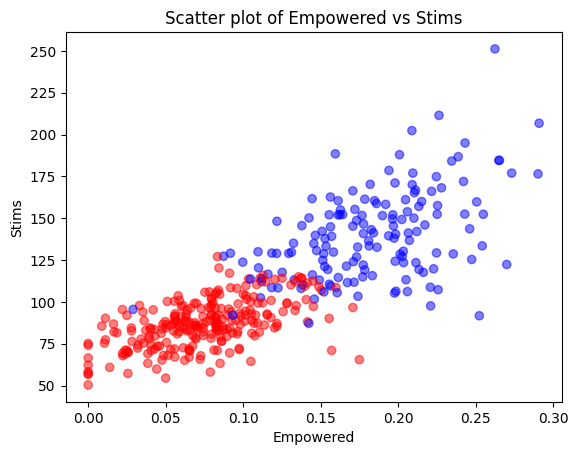

In [12]:
cmap = train_knight['knight'].map({'Jedi': 'blue', 'Sith': 'red'})
plot_scatter(train_knight, 'Empowered', 'Stims', cmap=cmap)

In [13]:
# make standardized data
# drop the 'knight' column before standardizing
train_knight_std = train_knight.copy().drop(columns=['knight'])
# manually standardize the data
train_knight_std = (train_knight_std - train_knight_std.mean()) / train_knight_std.std()
# add the 'knight' column back to the standardized data
train_knight_std['knight'] = train_knight['knight']

print(train_knight.head(1))
print(train_knight_std.head(1))

   Sensitivity  Hability  Strength  Power  Agility  Dexterity  Awareness  \
0         11.8     17.26     75.26  431.9  0.09087    0.06232    0.02853   

   Prescience  Reactivity  Midi-chlorien  ...  Evade  Stims  Sprint   Combo  \
0     0.01638      0.1847        0.06019  ...  24.49   86.0   562.0  0.1244   

    Delay  Attunement  Empowered   Burst  Grasping  knight  
0  0.1726      0.1449    0.05356  0.2779   0.08121    Sith  

[1 rows x 31 columns]
   Sensitivity  Hability  Strength     Power   Agility  Dexterity  Awareness  \
0    -0.671345 -0.446445 -0.700809 -0.646266 -0.407567  -0.811338  -0.769211   

   Prescience  Reactivity  Midi-chlorien  ...     Evade     Stims    Sprint  \
0   -0.865945    0.173241      -0.366082  ... -0.172304 -0.650671 -0.580283   

      Combo    Delay  Attunement  Empowered     Burst  Grasping  knight  
0 -0.366548 -0.52526   -0.611994  -0.951738 -0.180432 -0.150358    Sith  

[1 rows x 31 columns]


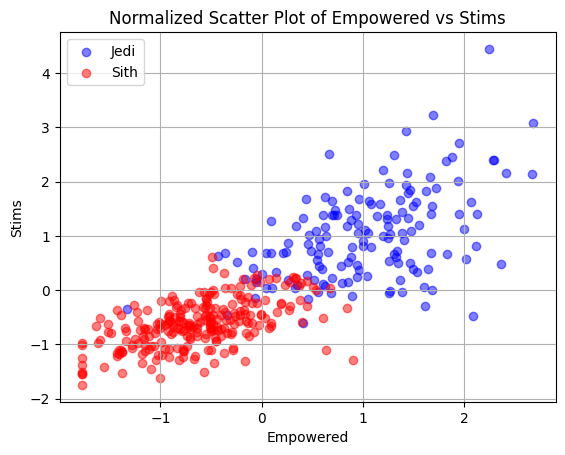

In [14]:
# plot standardized data
# plot_scatter(train_knight_std, 'Empowered', 'Stims', cmap=cmap)

# plt.scatter(train_knight_std['Empowered'], train_knight_std['Stims'], alpha=0.5, c=cmap)
# plt.xlabel('Empowered (standardized)')
# plt.ylabel('Stims (standardized)')
# plt.title('Scatter plot of Empowered vs Stims (standardized)')
# plt.legend(title='Knight')
# plt.show()


# this code can plot legend data
colors = {'Jedi': 'blue', 'Sith': 'red'}
for label in colors:
    subset = train_knight_std[train_knight_std['knight'] == label]
    plt.scatter(
        subset['Empowered'],
        subset['Stims'],
        alpha=0.5,
        c=colors[label],
        label=label
    )
plt.xlabel('Empowered')
plt.ylabel('Stims')
plt.title('Normalized Scatter Plot of Empowered vs Stims')
# plt.legend(title='Knight')
plt.legend()
plt.grid(True)
plt.show()